# Xac dinh NEN DOJI => Du bao dao chieu + can 1 nen xac nhan moi co the xac dinh dao chieu

# Cai dat thu vien

In [1]:
# ! pip install mplfinance

# Lay data cua VCB

In [2]:
# Import necessary modules
from ssi_fc_data import fc_md_client, model
import pandas as pd  # Import Pandas for DataFrame handling
import json
import configDataSSL

# Create a Market Data Client
client = fc_md_client.MarketDataClient(configDataSSL)

req = model.daily_ohlc('VCB', "01/07/2023", "17/11/2023")

data_dict = client.daily_ohlc(configDataSSL, req)
# Access the list of dictionaries in the "data" field
data_list = data_dict['data']

# Convert the list of dictionaries into a DataFrame
data = pd.DataFrame(data_list)

# Print or work with the DataFrame
print(data)

   Symbol Market TradingDate  Time   Open   High    Low  Close   Volume  \
0     VCB   HOSE  03/07/2023  None  84670  85347  84501  84670   490100   
1     VCB   HOSE  04/07/2023  None  85263  86279  84585  84670   682700   
2     VCB   HOSE  05/07/2023  None  85517  86787  84924  86363   953900   
3     VCB   HOSE  06/07/2023  None  86448  86533  85093  85263  1021000   
4     VCB   HOSE  07/07/2023  None  85093  88904  85009  88904  1064800   
..    ...    ...         ...   ...    ...    ...    ...    ...      ...   
93    VCB   HOSE  13/11/2023  None  86000  86100  85400  85500   937700   
94    VCB   HOSE  14/11/2023  None  86000  86500  85400  86000   987500   
95    VCB   HOSE  15/11/2023  None  86500  87700  86500  87700  4067800   
96    VCB   HOSE  16/11/2023  None  87000  88000  86700  88000  1284800   
97    VCB   HOSE  17/11/2023  None  87800  87900  85500  85600  1588000   

                Value  
0    49056489999.9998  
1         68866560000  
2    97096029999.9999  
3  

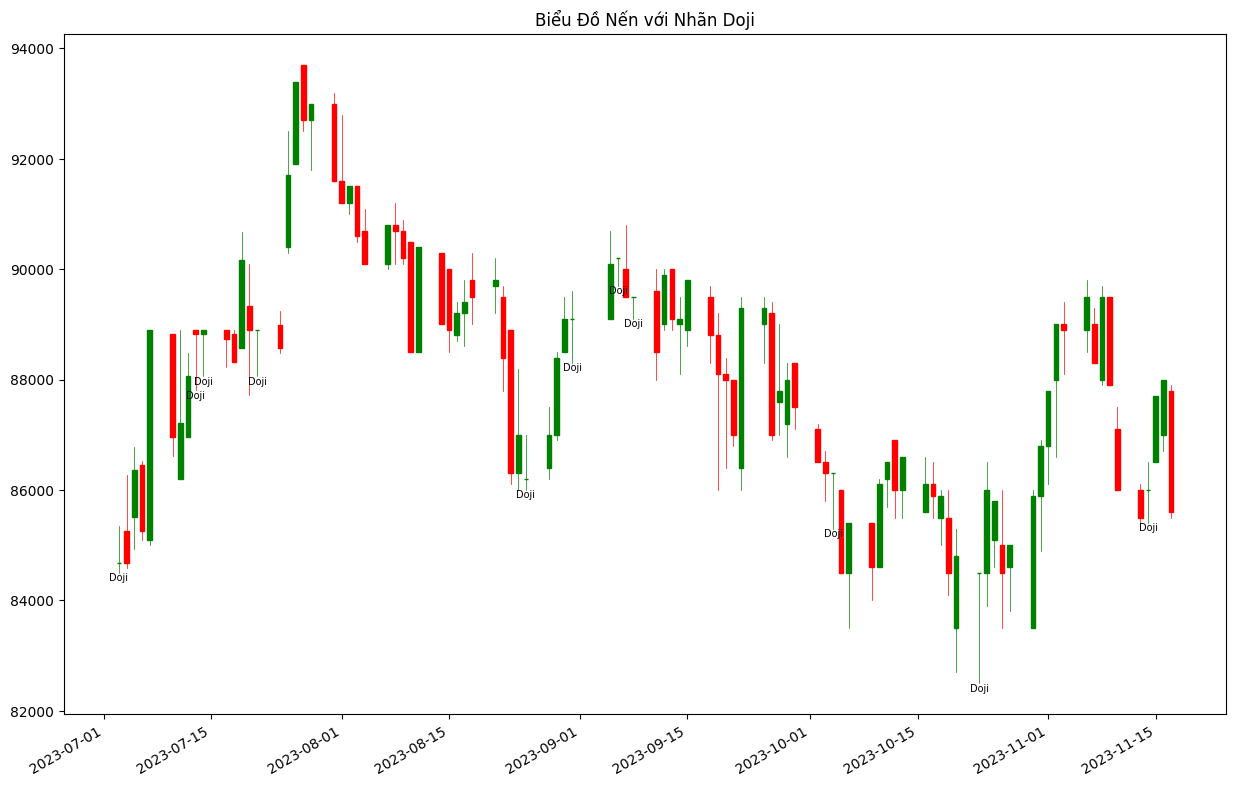

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# Giả sử 'data' là DataFrame của bạn chứa 'Open', 'High', 'Low', 'Close', 'Volume'
# Bạn cần đọc dữ liệu từ file CSV hoặc nguồn khác
# Ví dụ: data = pd.read_csv('path_to_your_csv.csv')

# Đảm bảo rằng cột 'TradingDate' đã được chuyển đổi thành datetime
data['TradingDate'] = pd.to_datetime(data['TradingDate'], dayfirst=True)
data.set_index('TradingDate', inplace=True)

# Chuyển đổi ngày thành số để vẽ biểu đồ
data['DateNum'] = mdates.date2num(data.index.to_pydatetime())
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
ohlc = data[['DateNum', 'Open', 'High', 'Low', 'Close']].values

# Tính toán Doji candles
doji_threshold = 0.1 / 100 * data['Close']  # 0.1% của giá đóng cửa là một ví dụ
data['Doji'] = abs(data['Open'] - data['Close']) <= doji_threshold

# Vẽ biểu đồ với kích thước lớn
fig, ax = plt.subplots(figsize=(15, 10))  # Bạn có thể điều chỉnh kích thước ở đây

# Vẽ mô hình nến
candlestick_ohlc(ax, ohlc, width=0.6, colorup='green', colordown='red')

# Đánh dấu Doji candles trên biểu đồ
for index, row in data.iterrows():
    if row['Doji']:
        # Vẽ nhãn "Doji" ở giá thấp hơn một chút so với giá thấp nhất
        ax.text(row['DateNum'], row['Low'], 'Doji', fontsize=7, color='black', 
                verticalalignment='top', horizontalalignment='center')

# Định dạng trục thời gian
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title("Biểu Đồ Nến với Nhãn Doji")
plt.show()


In [5]:
data

,Symbol,Market,Time,Open,High,Low,Close,Volume,Value,DateNum,Doji
TradingDate,,,,,,,,,,,
2023-07-03,VCB,HOSE,None,84670,85347,84501,84670,490100,49056489999.9998,19541.0,True
2023-07-04,VCB,HOSE,None,85263,86279,84585,84670,682700,68866560000,19542.0,False
2023-07-05,VCB,HOSE,None,85517,86787,84924,86363,953900,97096029999.9999,19543.0,False
2023-07-06,VCB,HOSE,None,86448,86533,85093,85263,1021000,103567080000,19544.0,False
2023-07-07,VCB,HOSE,None,85093,88904,85009,88904,1064800,109491700000,19545.0,False
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13,VCB,HOSE,None,86000,86100,85400,85500,937700,80335239999.9998,19674.0,False
2023-11-14,VCB,HOSE,None,86000,86500,85400,86000,987500,84764000000,19675.0,True
2023-11-15,VCB,HOSE,None,86500,87700,86500,87700,4067800,353911960000.0020,19676.0,False


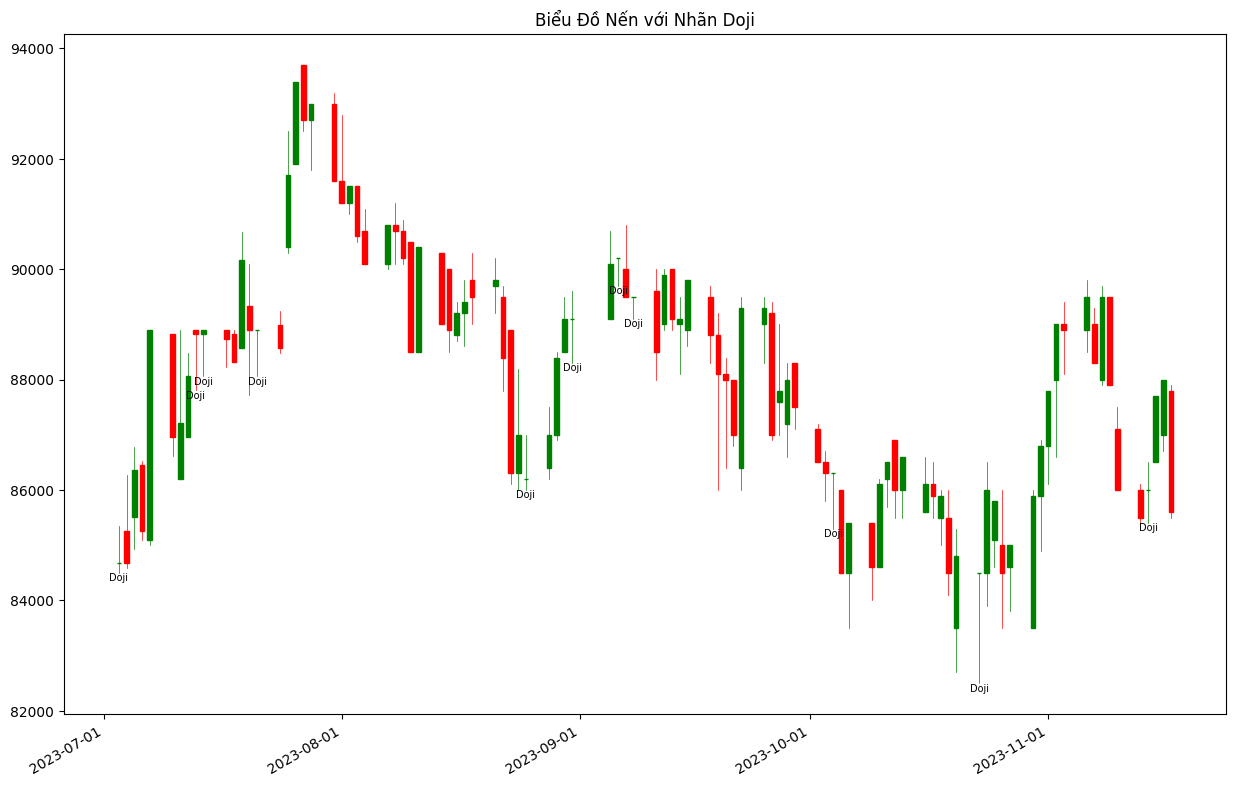

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# Bước 1: Đọc dữ liệu từ file CSV hoặc nguồn của bạn

# Bước 2: Định nghĩa ngưỡng để xác định nến Doji
doji_threshold = 0.1 / 100 * data['Close']  # 0.1% của giá đóng cửa là một ví dụ
data['Doji'] = abs(data['Open'] - data['Close']) <= doji_threshold

# Bước 3: Tạo một DataFrame mới chứa tất cả các ngày, kể cả ngày không giao dịch
all_days = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
all_days_df = pd.DataFrame(index=all_days)

# Bước 4: Kết hợp DataFrame này với dữ liệu gốc của bạn
full_data = all_days_df.join(data, how='left')
full_data['DateNum'] = mdates.date2num(full_data.index.to_pydatetime())

# Bước 5: Vẽ biểu đồ nến và đánh dấu các nến Doji
fig, ax = plt.subplots(figsize=(15, 10))
ohlc = full_data[['DateNum', 'Open', 'High', 'Low', 'Close']].dropna().values

# Vẽ mô hình nến
candlestick_ohlc(ax, ohlc, width=0.6, colorup='green', colordown='red')

# Đánh dấu Doji candles trên biểu đồ
for index, row in data.iterrows():
    if row['Doji']:
        # Vẽ nhãn "Doji" ở giá thấp hơn một chút so với giá thấp nhất
        ax.text(row['DateNum'], row['Low'], 'Doji', fontsize=7, color='black', 
                verticalalignment='top', horizontalalignment='center')

# Thiết lập locator và formatter cho trục x để hiển thị theo tháng
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Chỉ đặt tick ở đầu mỗi tháng
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Hiển thị năm và tháng

# Đảm bảo rằng mỗi tick trục x có đủ không gian, có thể cần phải xoay các nhãn
fig.autofmt_xdate()

plt.title("Biểu Đồ Nến với Nhãn Doji")
plt.show()


In [1]:
data

NameError: name 'data' is not defined

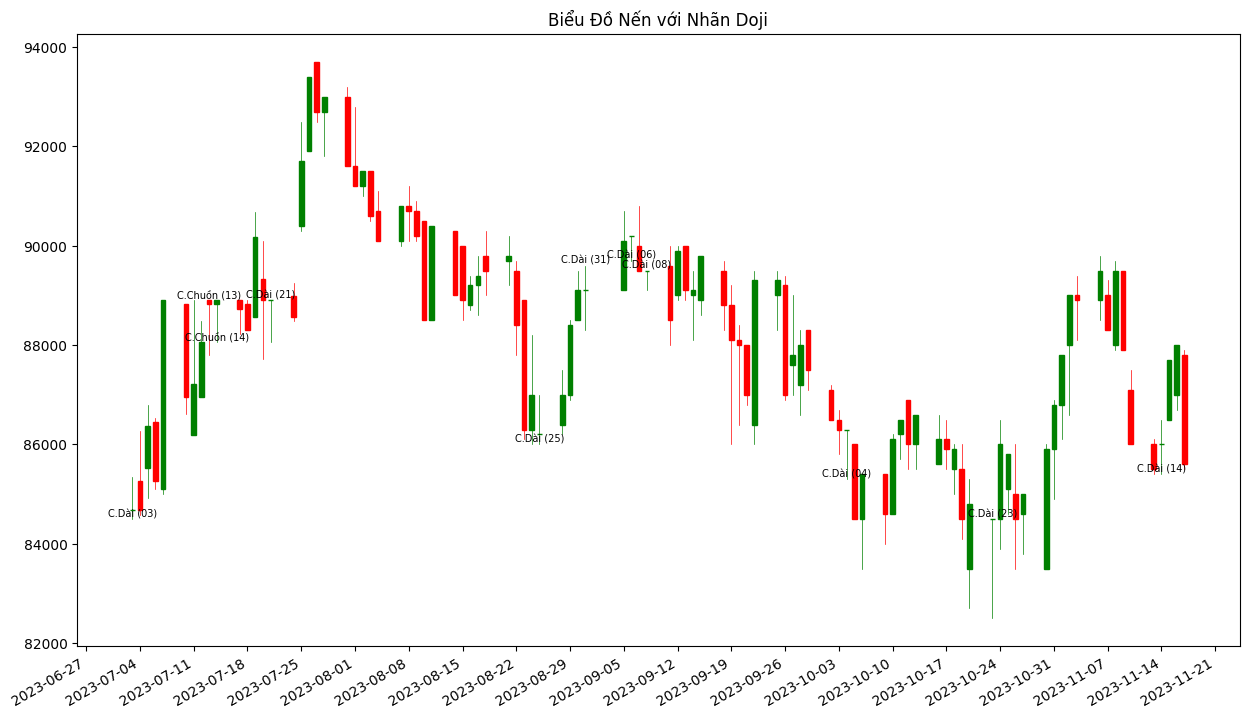

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# Bước 1: Đọc dữ liệu từ file CSV hoặc nguồn của bạn
# data lay o tren

# Chuyển đổi cột giá trị sang kiểu số
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Bước 2: Xác định loại Doji
data['Doji_Type'] = None
for index, row in data.iterrows():
    upper_shadow = row['High'] - max(row['Open'], row['Close'])
    lower_shadow = min(row['Open'], row['Close']) - row['Low']
    body_range = abs(row['Close'] - row['Open'])
    doji_threshold = 0.1 / 100 * row['Close']  # Ví dụ: 0.1% của giá đóng cửa

    if body_range <= doji_threshold: # Xác định Doji
        if upper_shadow >= 2 * body_range and lower_shadow >= 2 * body_range:
            data.at[index, 'Doji_Type'] = 'C.Dài'
        elif lower_shadow >= 2 * body_range and upper_shadow < body_range:
            data.at[index, 'Doji_Type'] = 'C.Chuồn'
        elif upper_shadow >= 2 * body_range and lower_shadow < body_range:
            data.at[index, 'Doji_Type'] = 'S.Trời'
        else:
            data.at[index, 'Doji_Type'] = 'B.Mộ'

# Chuẩn bị dữ liệu cho mô hình nến
data['DateNum'] = mdates.date2num(data.index.to_pydatetime())
ohlc = data[['DateNum', 'Open', 'High', 'Low', 'Close']].values

# Bước 3: Vẽ biểu đồ nến và đánh dấu các nến Doji
fig, ax = plt.subplots(figsize=(15, 9))
candlestick_ohlc(ax, ohlc, width=0.6, colorup='green', colordown='red')

# Đánh dấu các nến Doji trên biểu đồ
hienthi = 1
for index, row in data.iterrows():
    if row['Doji_Type'] is not None:
        date_str = mdates.num2date(row['DateNum']).strftime('%d')
        # Sử dụng cú pháp Python cho toán tử điều kiện:
        position = row['High'] if hienthi % 2 == 0 else row['Low']
        hienthi = hienthi + 1
        ax.text(row['DateNum'], position, f"{row['Doji_Type']} ({date_str})", fontsize=7, color='black',
                verticalalignment='bottom', horizontalalignment='center')

# Thiết lập locator và formatter cho trục x để hiển thị theo tháng
ax.xaxis.set_major_locator(mdates.WeekdayLocator())  # Chỉ đặt tick ở đầu mỗi tháng
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Hiển thị năm và tháng

# Đảm bảo rằng mỗi tick trục x có đủ không gian, có thể cần phải xoay các nhãn
fig.autofmt_xdate()

plt.title("Biểu Đồ Nến với Nhãn Doji")
plt.show()

In [7]:
data

,Symbol,Market,Time,Open,High,Low,Close,Volume,Value,DateNum,Doji,Doji_Type
TradingDate,,,,,,,,,,,,
2023-07-03,VCB,HOSE,None,84670,85347,84501,84670,490100,49056489999.9998,19541.0,True,C.Dài
2023-07-04,VCB,HOSE,None,85263,86279,84585,84670,682700,68866560000,19542.0,False,None
2023-07-05,VCB,HOSE,None,85517,86787,84924,86363,953900,97096029999.9999,19543.0,False,None
2023-07-06,VCB,HOSE,None,86448,86533,85093,85263,1021000,103567080000,19544.0,False,None
2023-07-07,VCB,HOSE,None,85093,88904,85009,88904,1064800,109491700000,19545.0,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13,VCB,HOSE,None,86000,86100,85400,85500,937700,80335239999.9998,19674.0,False,None
2023-11-14,VCB,HOSE,None,86000,86500,85400,86000,987500,84764000000,19675.0,True,C.Dài
2023-11-15,VCB,HOSE,None,86500,87700,86500,87700,4067800,353911960000.0020,19676.0,False,None
